<a href="https://colab.research.google.com/github/mehhikr/vjctp24/blob/main/Hackathon2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#prime the data set + code (RUN EVERY TIME YOU OPEN THIS TAB)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv('spotify-2023.csv')
df = df.fillna(df.median(numeric_only=True)) #fill missing values using fillna for GAORUI
df1 = pd.read_csv('spotify-2023 unmodified.csv')
df1 = df1.fillna(df1.median(numeric_only=True))
df.describe()



# Note that if reference to data is required, variable is df
# Note that if reference to ummodified data is required, variable is df1

artist_count  released_year  released_month  released_day  \
count    952.000000     952.000000      952.000000    952.000000   
mean       1.556723    2018.288866        6.038866     13.944328   
std        0.893331      11.011397        3.564571      9.197223   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

            streams         bpm  danceability_%   valence_%    energy_%  \
count  9.520000e+02  952.000000      952.000000  952.000000  952.000000   
mean   5.141374e+08  122.553571       66.984244   51.406513   64.274160   
std    5.668569e+08   28.069601       14.631282   23.480526   16.558517   
min    2.762000e+03   65.000000       23.000000    4.000000    9.000000   
25%    1.416362e+08   99.750000       57.000000   32.000000   53.000000   
50%    2.905309e+08  121.000000       69.000000   51.000000   66.000000   
75%    6.738690e+08  140.250000       78.000000   70.000000   77.000000   
max    3.703895e+09  206.000000       96.000000   97.000000   97.000000   

       acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
count      952.000000          952.000000  952.000000     952.000000  
mean        27.078782            1.582983   18.214286      10.138655  
std         26.001599            8.414064   13.718374       9.915399  
min          0.000000            0.000000    3.000000       2.000000  
25%          6.000000            0.000000   10.000000       4.000000  
50%         18.000000            0.000000   12.000000       6.000000  
75%         43.000000            0.000000   24.000000      11.000000  
max         97.000000           91.000000   97.000000      64.000000

## **EDA**

Number of outliers in artist_count: 12
Number of outliers in released_year: 31
Number of outliers in released_month: 0
Number of outliers in released_day: 0
Number of outliers in streams: 22
Number of outliers in bpm: 0
Number of outliers in danceability_%: 1
Number of outliers in valence_%: 0
Number of outliers in energy_%: 2
Number of outliers in acousticness_%: 0
Number of outliers in instrumentalness_%: 19
Number of outliers in liveness_%: 21
Number of outliers in speechiness_%: 17


<Axes: xlabel='released_month', ylabel='released_year'>

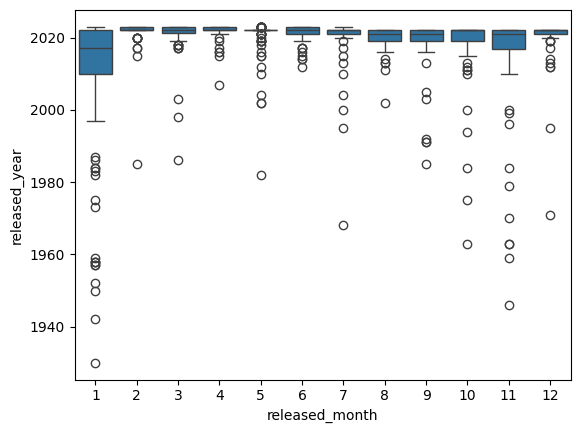

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['song_name', 'artist', 'key', 'mode']]

z_scores = {}
for col in numeric_cols:
  z_scores[col] = (df[col] - df[col].mean()) / df[col].std()

outliers = {}
for col, z_score in z_scores.items():
  outliers[col] = df[abs(z_score) > 3]

for col, outlier_df in outliers.items():
  print(f"Number of outliers in {col}: {len(outlier_df)}")

sns.boxplot(x='released_month',y='released_year', data=df)


<ipython-input-55-955825c08204>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


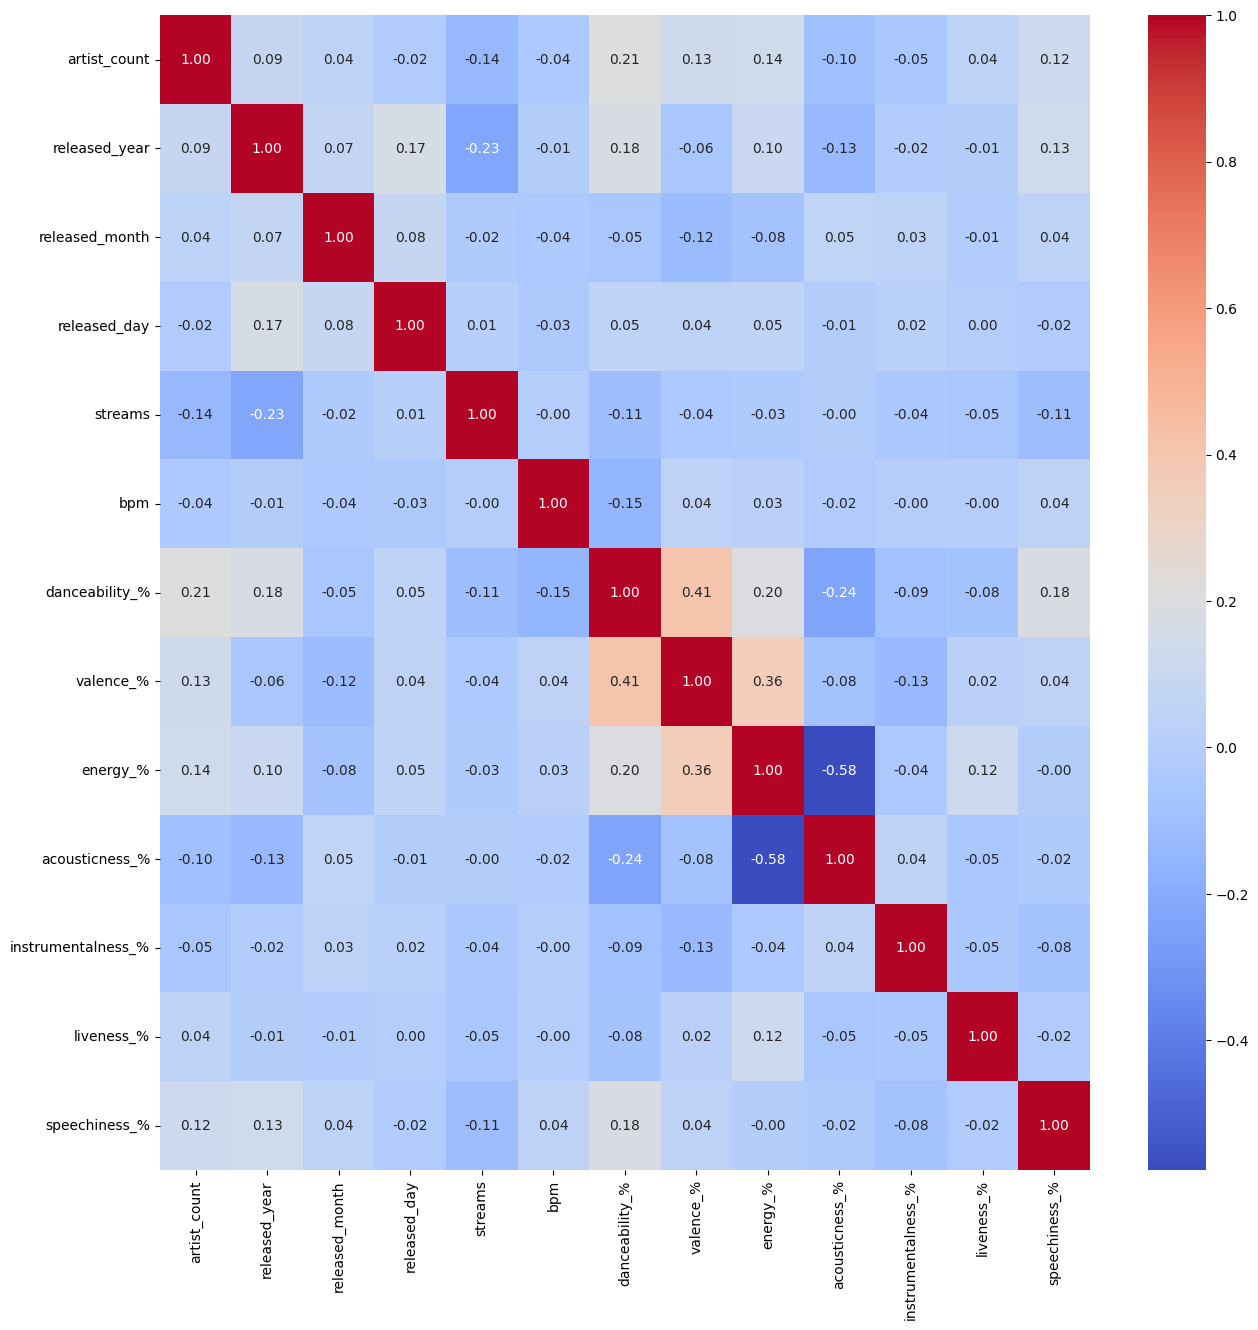

In [ ]:

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm")

plt.show()

#Reading correlation matrix
#1 means completly dependent
#0 means neutral
#-1 means completely independent

# **Graph and Characteristics of Song**



Artist count : One (if multiple are needed, 2, 3 or 7 is best)

Release month : January or September

Release day : 1st or 31st
  
BPM : 100 - 120

Key : C# or E

Mode : Major

Dancability : High

Valence : High

Energy : High

Accousticness : Not important ( low )

Instrumentalness : Not important ( low - zero )

Liveliness : Not important ( low - zero )

Speechiness : Not important ( low - zero )

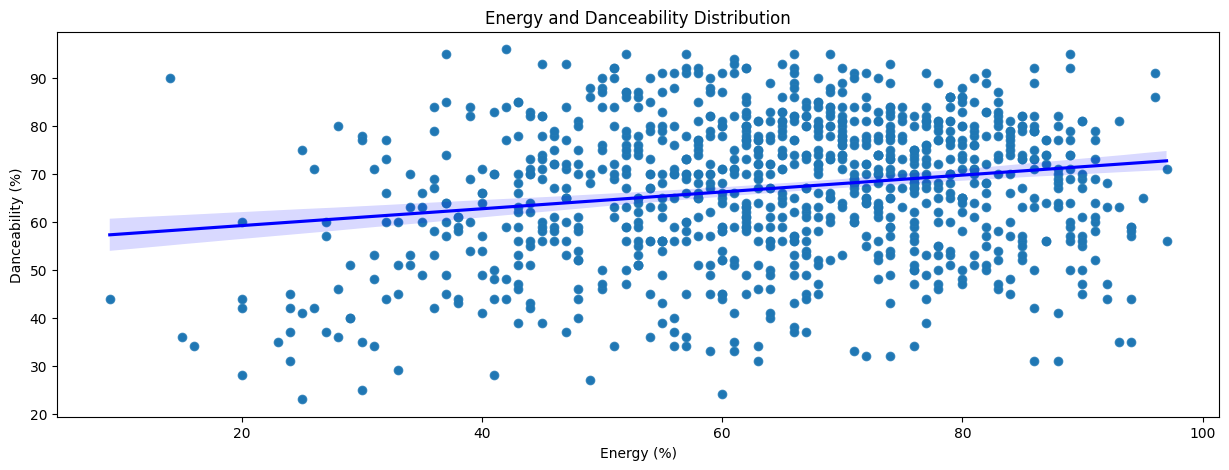

In [ ]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x='energy_%', y='danceability_%')
sns.regplot(data=df, x='energy_%', y='danceability_%', line_kws={'color': 'blue'})

plt.xlabel('Energy (%)')
plt.ylabel('Danceability (%)')
plt.title('Energy and Danceability Distribution')

plt.show()


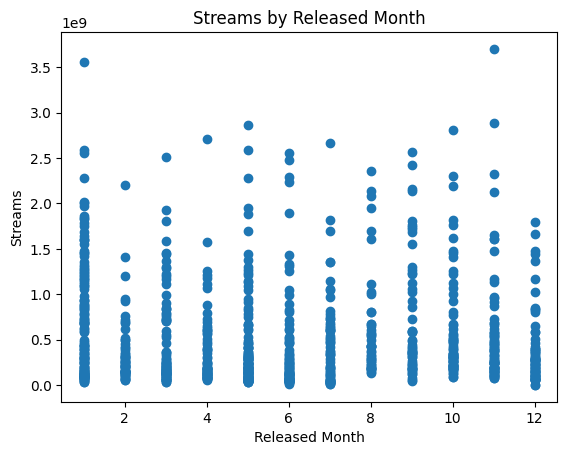

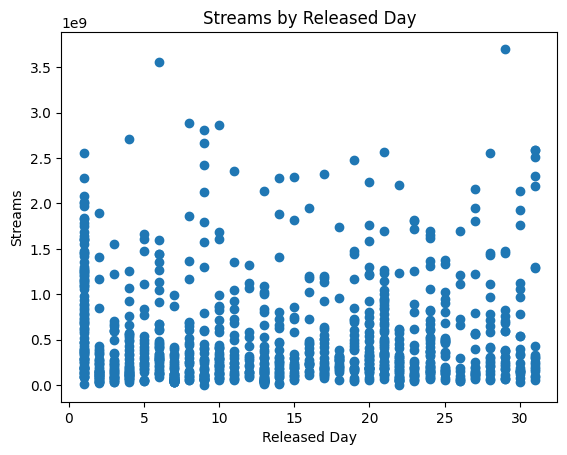

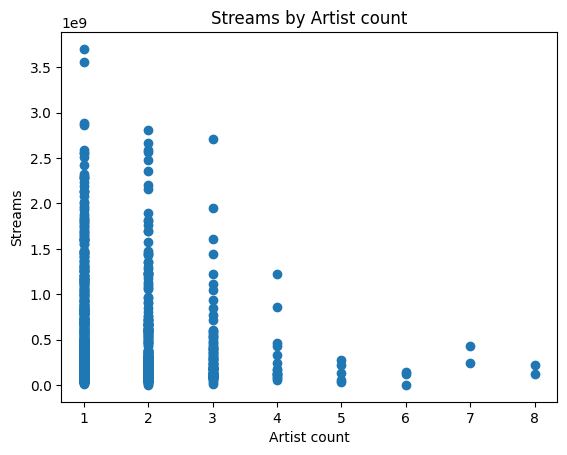

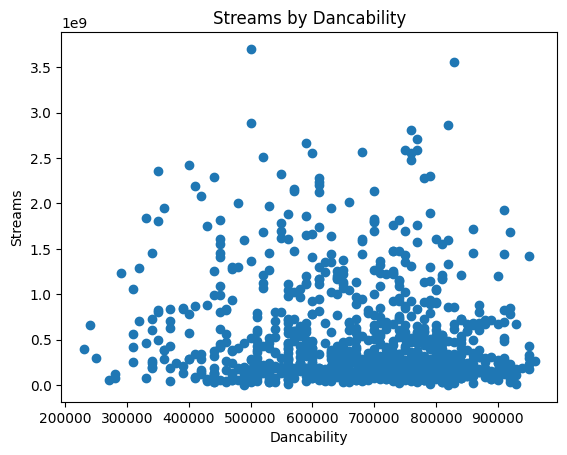

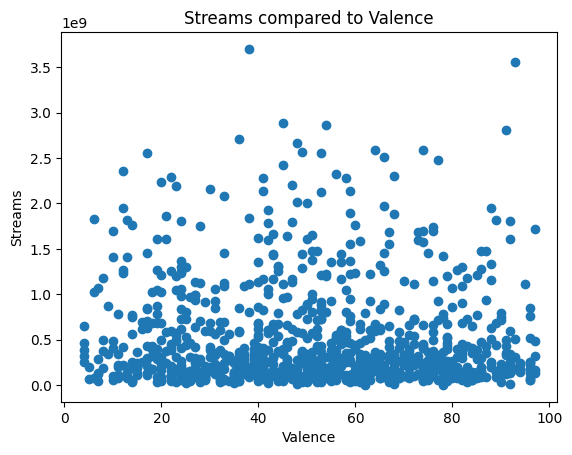

In [ ]:
plt.scatter(df['released_month'], df['streams'])
plt.xlabel('Released Month')
plt.ylabel('Streams')
plt.title('Streams by Released Month')
plt.show()


plt.scatter(df['released_day'], df['streams'])
plt.xlabel('Released Day')
plt.ylabel('Streams')
plt.title('Streams by Released Day')
plt.show()

plt.scatter(df['artist_count'], df['streams'])
plt.xlabel('Artist count')
plt.ylabel('Streams')
plt.title('Streams by Artist count')
plt.show()

plt.scatter(df['danceability_%'], df['streams'])
plt.xlabel('Dancability')
plt.ylabel('Streams')
plt.title('Streams by Dancability')
plt.show()

plt.scatter(df['valence_%'], df['streams'])
plt.xlabel('Valence')
plt.ylabel('Streams')
plt.title('Streams compared to Valence')
plt.show()

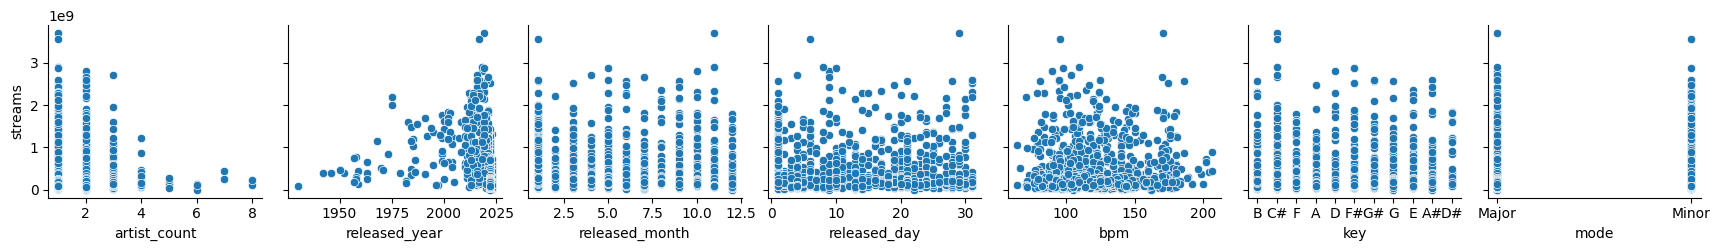

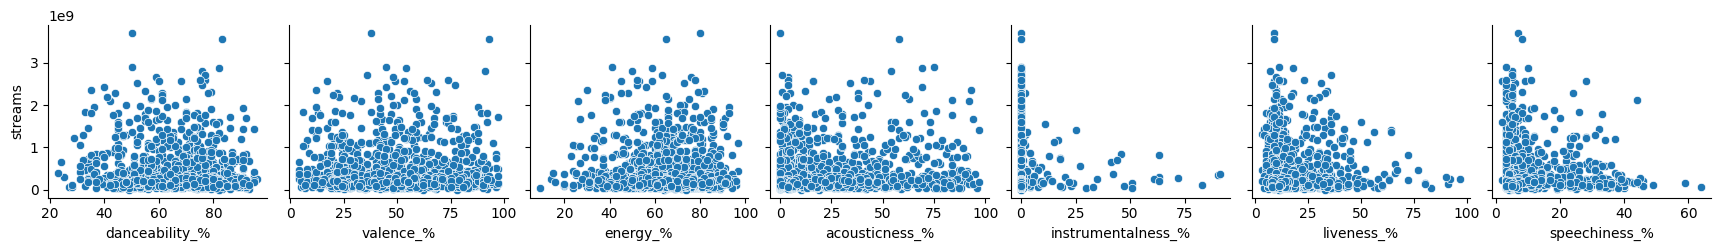

In [ ]:
sns.pairplot(df, x_vars=['artist_count', 'released_year', 'released_month', 'released_day', 'bpm', 'key', 'mode'], y_vars=['streams'])
plt.show()

sns.pairplot(df, x_vars=['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], y_vars=['streams'])
plt.show()

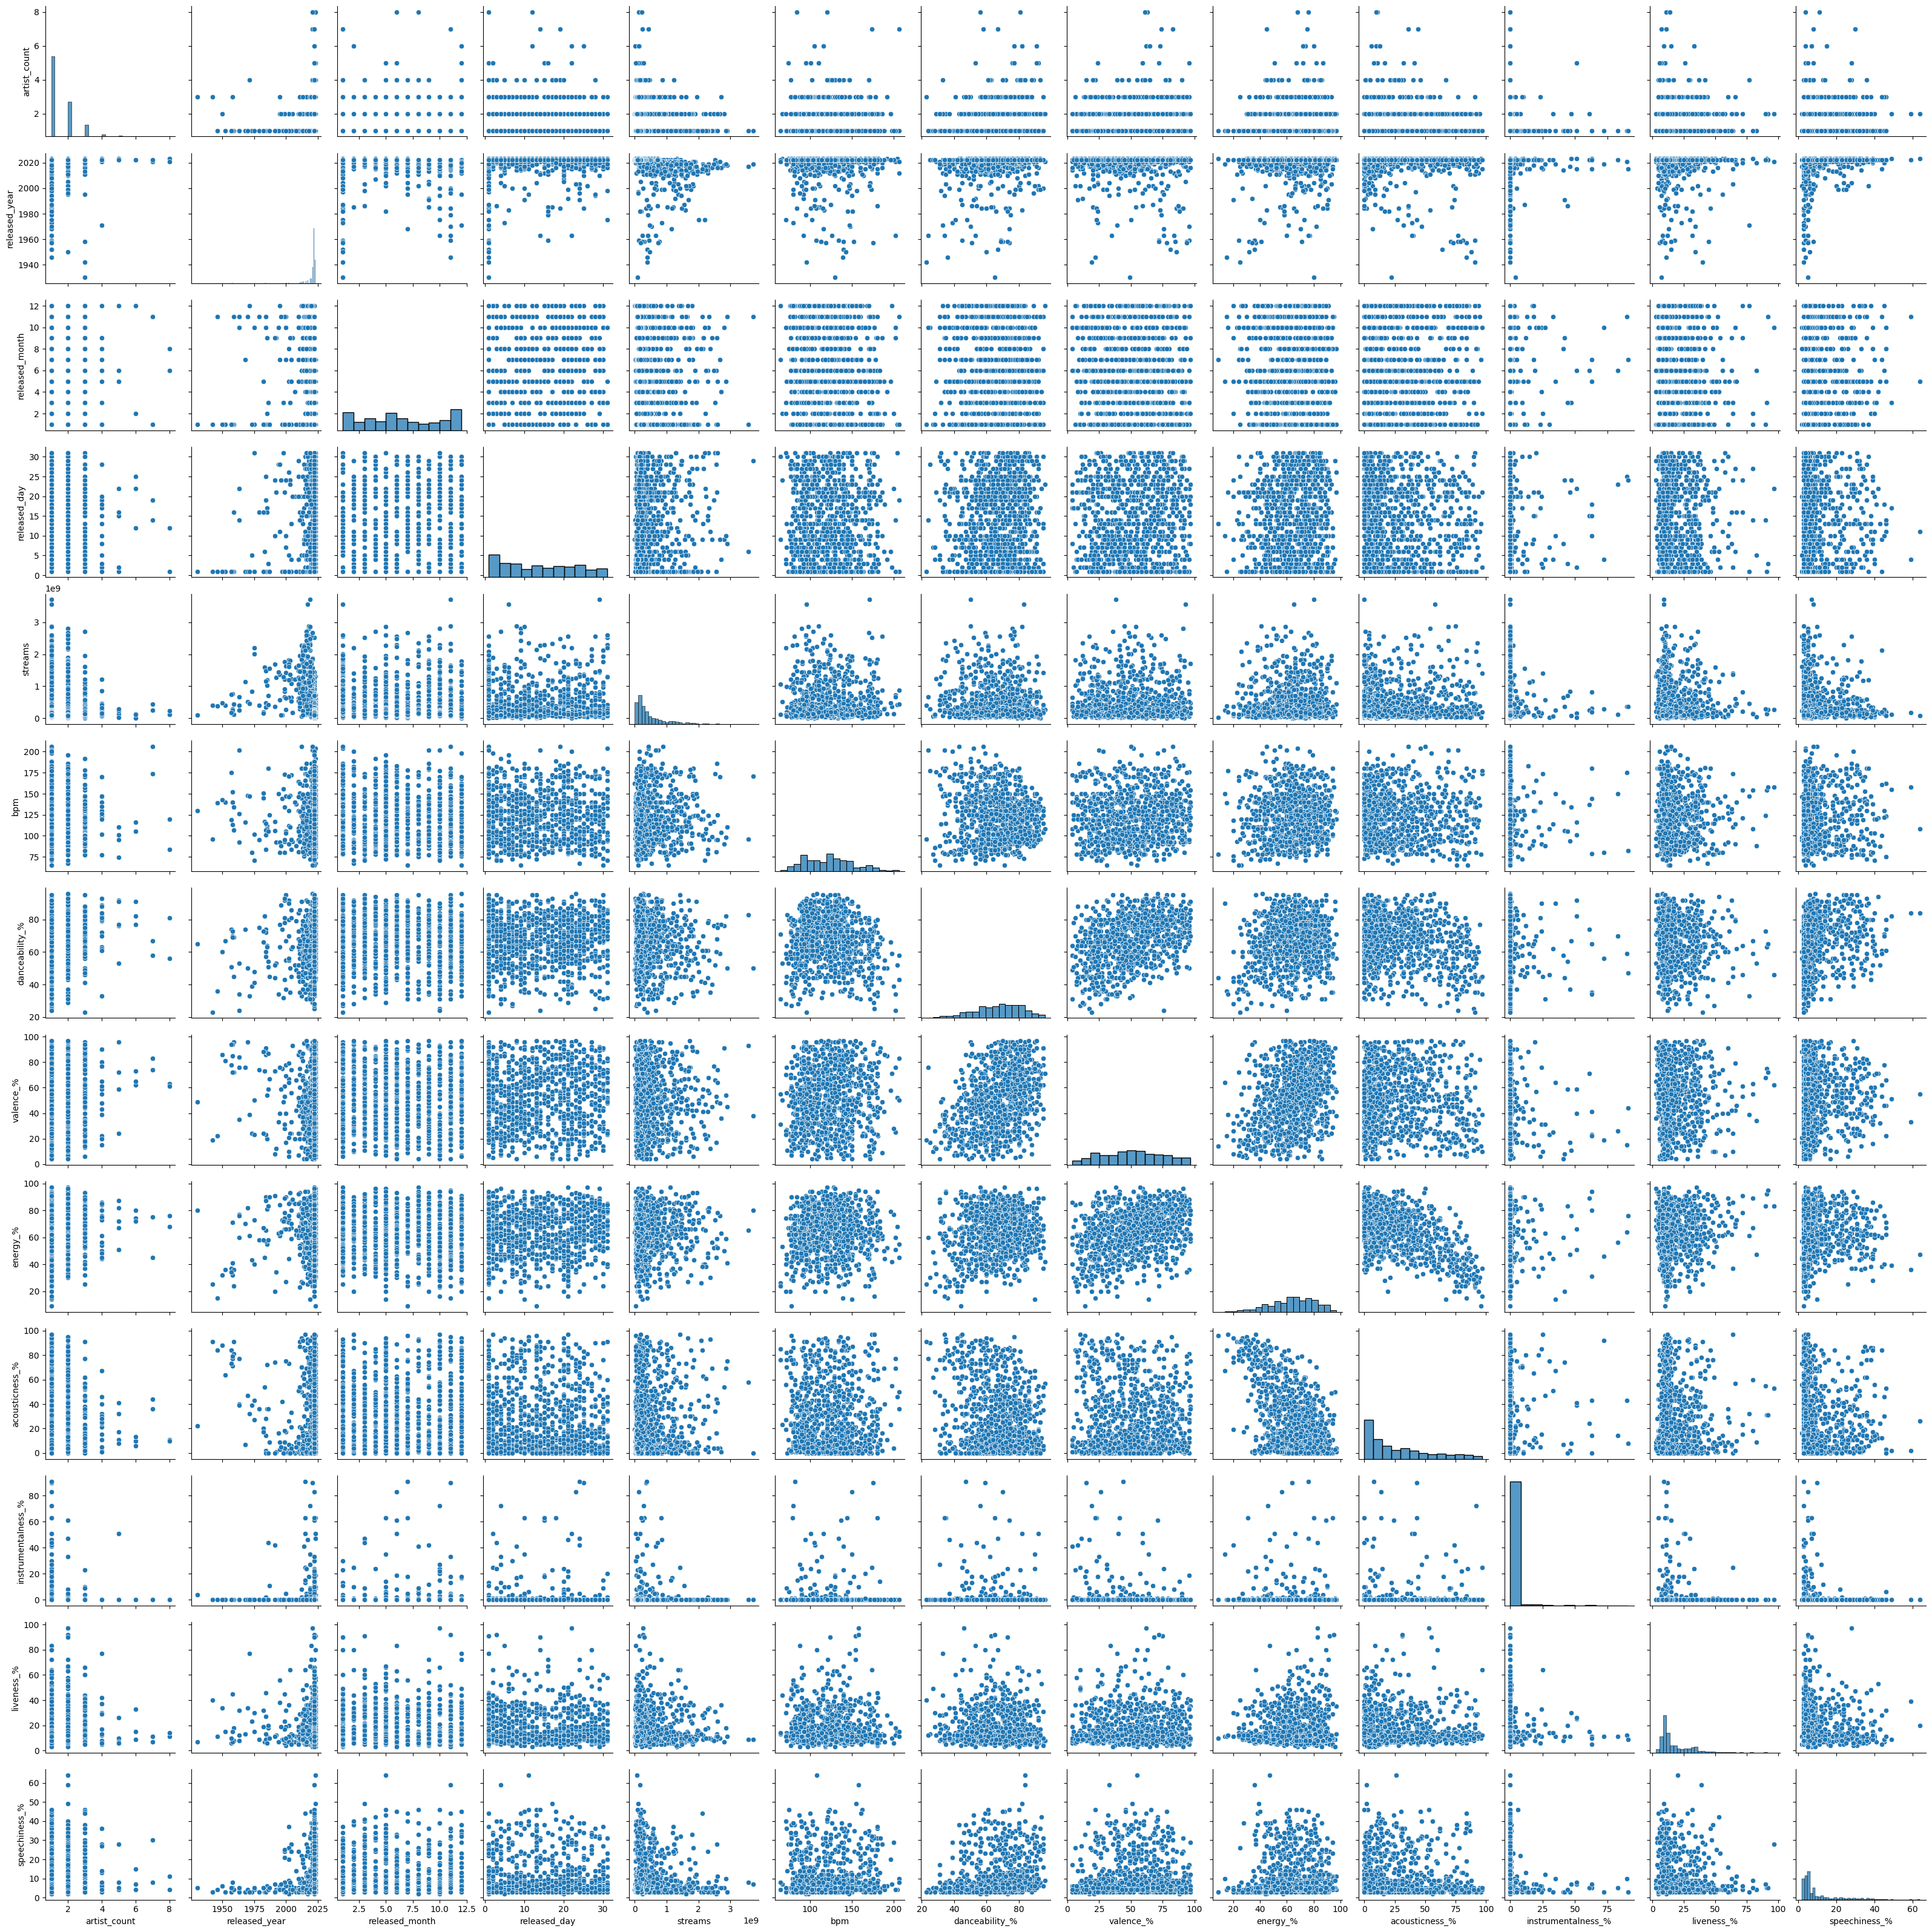

In [ ]:
sns.pairplot(df)
plt.show()

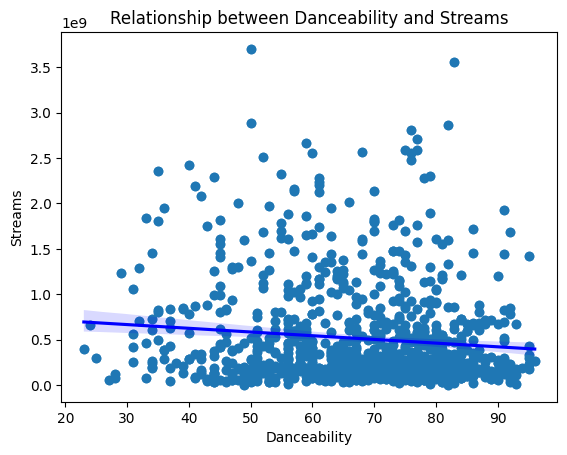

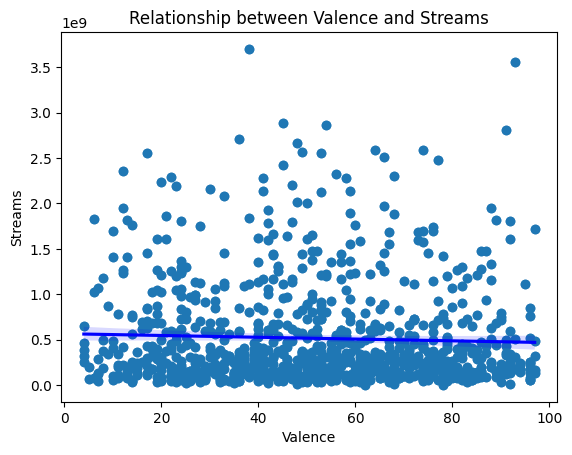

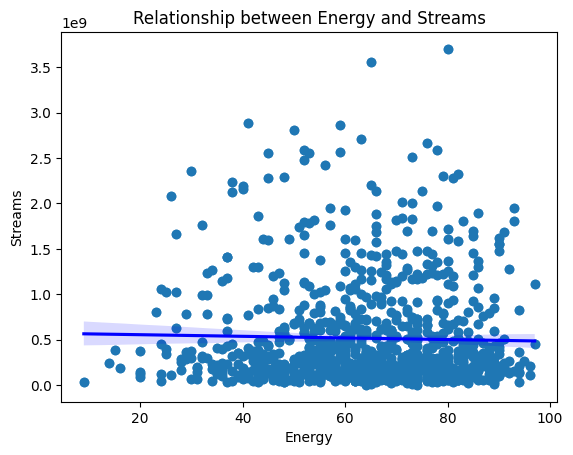

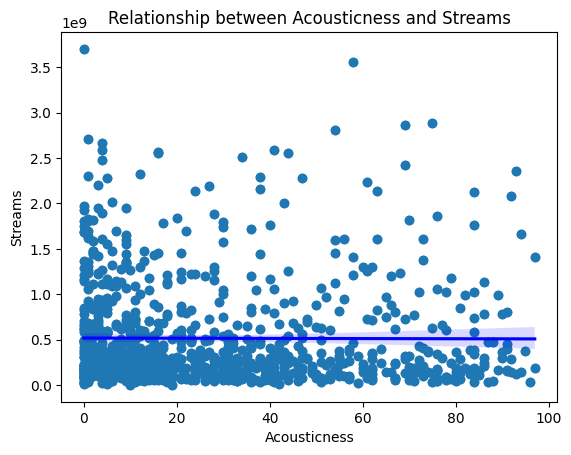

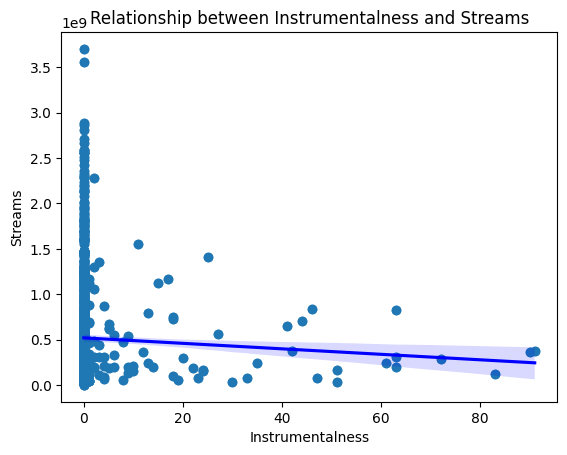

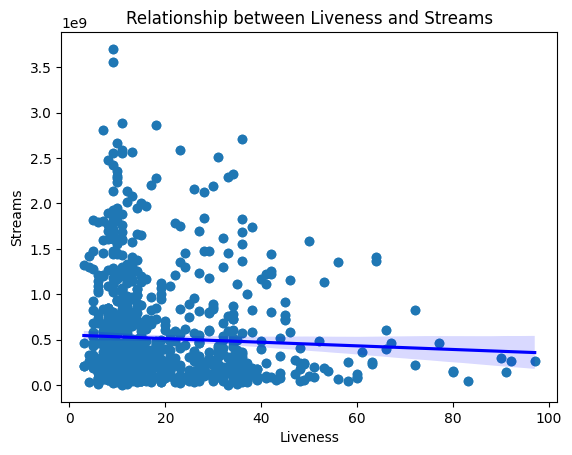

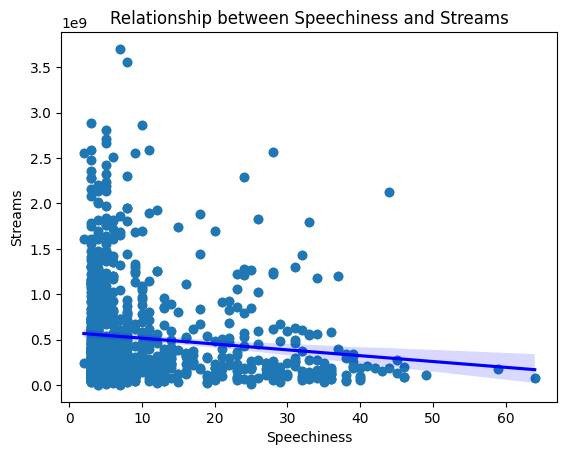

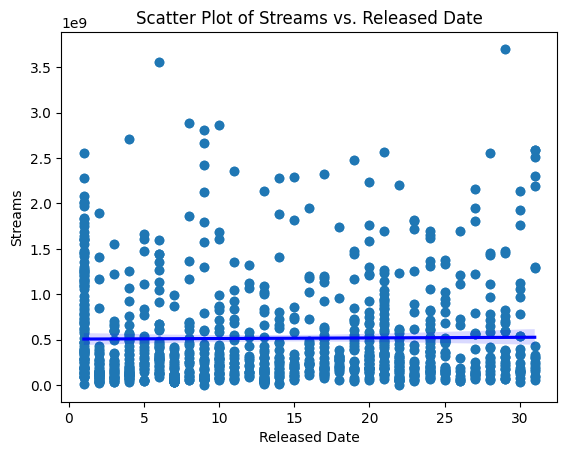

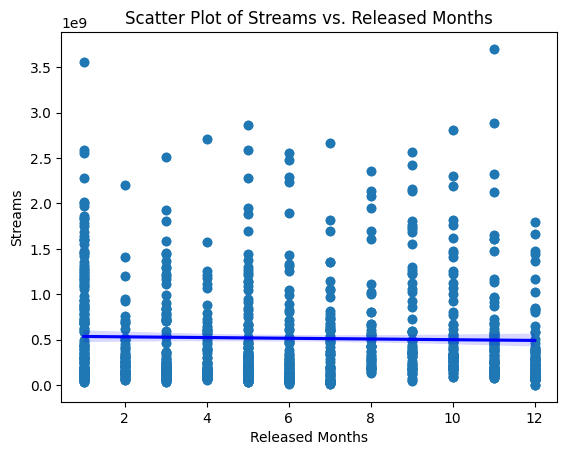

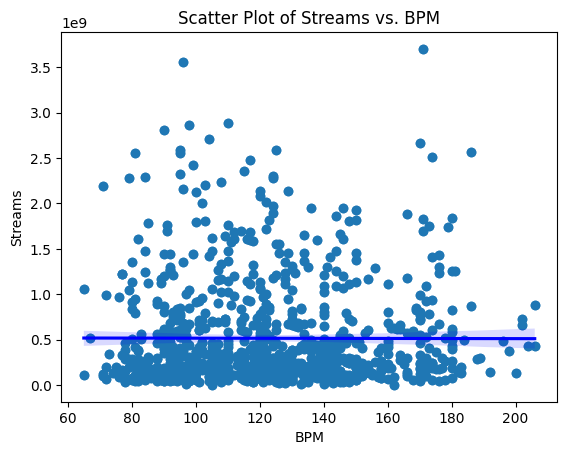

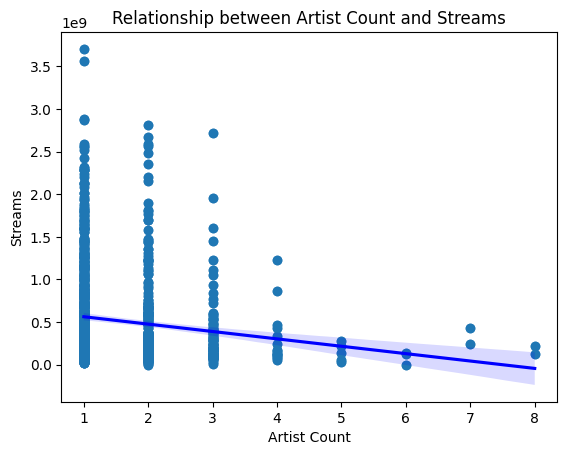

In [ ]:
#NOTE: use ai to reduce repetitiveness
# prompt: Do scatter graph on danceability_% and streams, valence_% and streams, energy_% and streams, acousticness_% and streams, instrumentalness_% and streams, liveness_% and streams, speechiness_% and streams

#  scatter plot of the relationship between 'danceability_%' and 'streams'
plt.scatter(df['danceability_%'], df['streams'])
sns.regplot(data=df, x='danceability_%', y='streams', line_kws={'color': 'blue'})
plt.title('Relationship between Danceability and Streams')
plt.xlabel('Danceability')
plt.ylabel('Streams')
plt.show()

#  scatter plot of the relationship between 'valence_%' and 'streams'
plt.scatter(df['valence_%'], df['streams'])
sns.regplot(data=df, x='valence_%', y='streams', line_kws={'color': 'blue'})
plt.title('Relationship between Valence and Streams')
plt.xlabel('Valence')
plt.ylabel('Streams')
plt.show()

#  scatter plot of the relationship between 'energy_%' and 'streams'
plt.scatter(df['energy_%'], df['streams'])
sns.regplot(data=df, x='energy_%', y='streams', line_kws={'color': 'blue'})
plt.title('Relationship between Energy and Streams')
plt.xlabel('Energy')
plt.ylabel('Streams')
plt.show()

#  scatter plot of the relationship between 'acousticness_%' and 'streams'
plt.scatter(df['acousticness_%'], df['streams'])
sns.regplot(data=df, x='acousticness_%', y='streams', line_kws={'color': 'blue'})
plt.title('Relationship between Acousticness and Streams')
plt.xlabel('Acousticness')
plt.ylabel('Streams')
plt.show()

#  scatter plot of the relationship between 'instrumentalness_%' and 'streams'
plt.scatter(df['instrumentalness_%'], df['streams'])
sns.regplot(data=df, x='instrumentalness_%', y='streams', line_kws={'color': 'blue'})
plt.title('Relationship between Instrumentalness and Streams')
plt.xlabel('Instrumentalness')
plt.ylabel('Streams')
plt.show()

#  scatter plot of the relationship between 'liveness_%' and 'streams'
plt.scatter(df['liveness_%'], df['streams'])
sns.regplot(data=df, x='liveness_%', y='streams', line_kws={'color': 'blue'})
plt.title('Relationship between Liveness and Streams')
plt.xlabel('Liveness')
plt.ylabel('Streams')
plt.show()

#  scatter plot of the relationship between 'speechiness_%' and 'streams'
plt.scatter(df['speechiness_%'], df['streams'])
sns.regplot(data=df, x='speechiness_%', y='streams', line_kws={'color': 'blue'})
plt.title('Relationship between Speechiness and Streams')
plt.xlabel('Speechiness')
plt.ylabel('Streams')
plt.show()

# Scatter plot of streams vs. released_date
plt.scatter(df['released_day'], df['streams'])
sns.regplot(data=df, x='released_day', y='streams', line_kws={'color': 'blue'})
plt.xlabel('Released Date')
plt.ylabel('Streams')
plt.title('Scatter Plot of Streams vs. Released Date')
plt.show()

# Scatter plot of streams vs. released_months
plt.scatter(df['released_month'], df['streams'])
sns.regplot(data=df, x='released_month', y='streams', line_kws={'color': 'blue'})
plt.xlabel('Released Months')
plt.ylabel('Streams')
plt.title('Scatter Plot of Streams vs. Released Months')
plt.show()

# scatter plot of streams vs bpm
plt.scatter(df['bpm'], df['streams'])
sns.regplot(data=df, x='bpm', y='streams', line_kws={'color': 'blue'})
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.title('Scatter Plot of Streams vs. BPM')
plt.show()

#  scatter plot of the relationship between 'artist_count' and 'streams'
plt.scatter(df['artist_count'], df['streams'])
sns.regplot(data=df, x='artist_count', y='streams', line_kws={'color': 'blue'})
plt.title('Relationship between Artist Count and Streams')
plt.xlabel('Artist Count')
plt.ylabel('Streams')
plt.show()


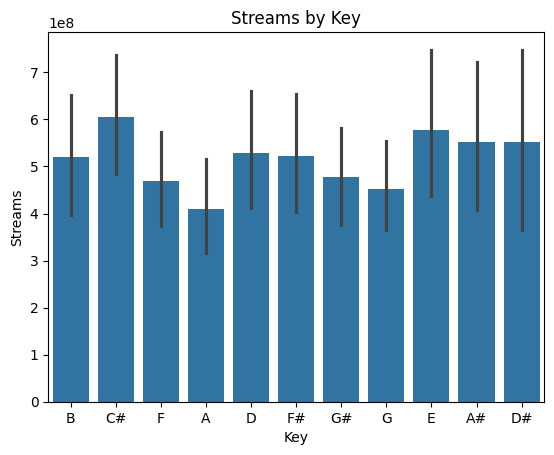

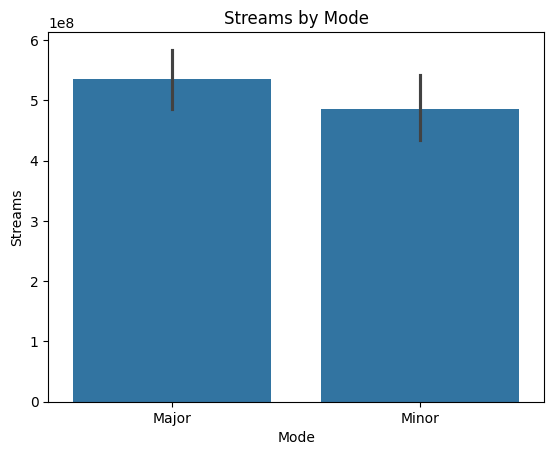

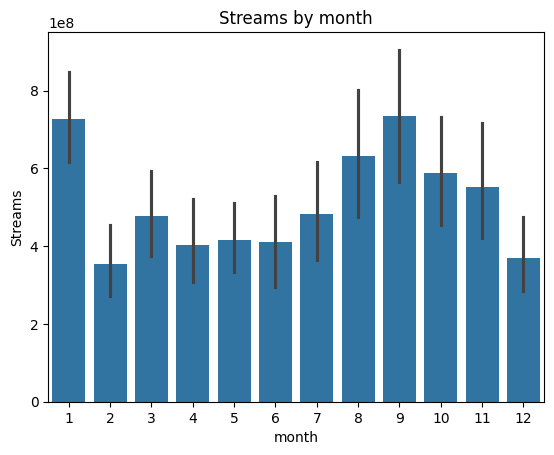

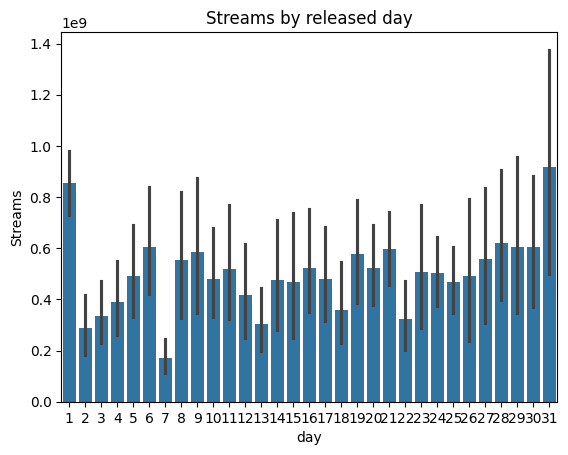

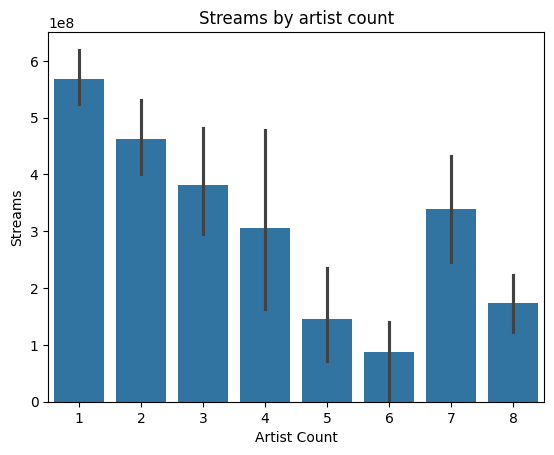

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='key', y='streams', data=df)
plt.title('Streams by Key')
plt.xlabel('Key')
plt.ylabel('Streams')
plt.show()
sns.barplot(x='mode', y='streams', data=df)
plt.title('Streams by Mode')
plt.xlabel('Mode')
plt.ylabel('Streams')
plt.show()
sns.barplot(x='released_month', y='streams', data=df)
plt.title('Streams by month')
plt.xlabel('month')
plt.ylabel('Streams')
plt.show()
sns.barplot(x='released_day', y='streams', data=df)
plt.title('Streams by released day')
plt.xlabel('day')
plt.ylabel('Streams')
plt.show()
sns.barplot(x='artist_count', y='streams', data=df)
plt.title('Streams by artist count')
plt.xlabel('Artist Count')
plt.ylabel('Streams')
plt.show()



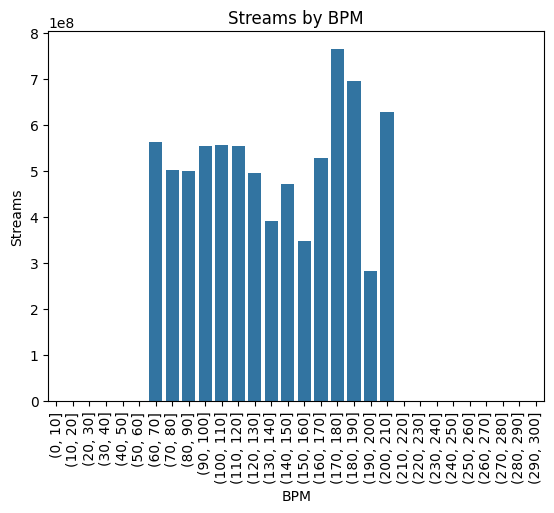

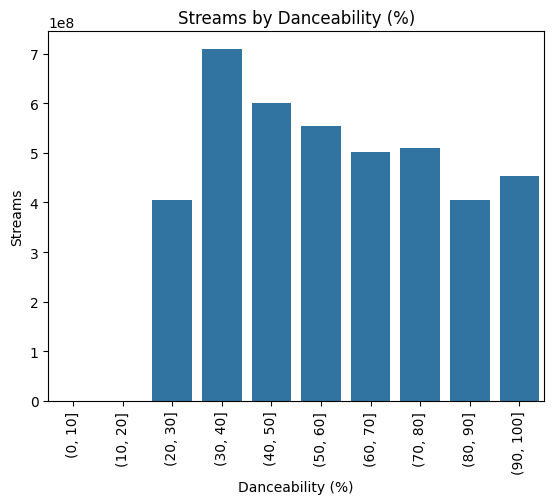

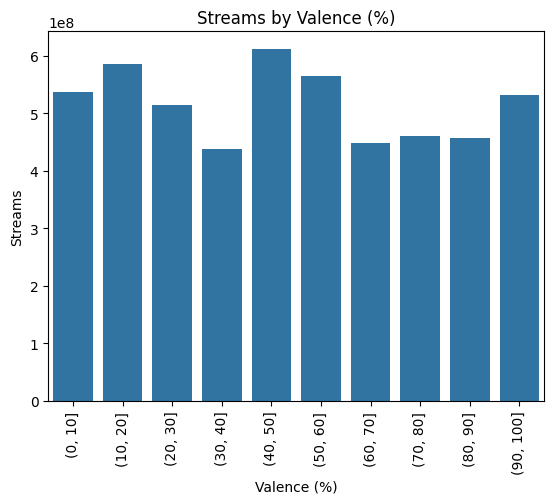

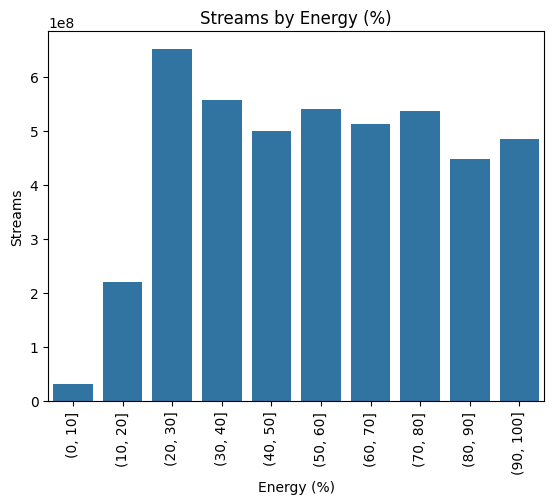

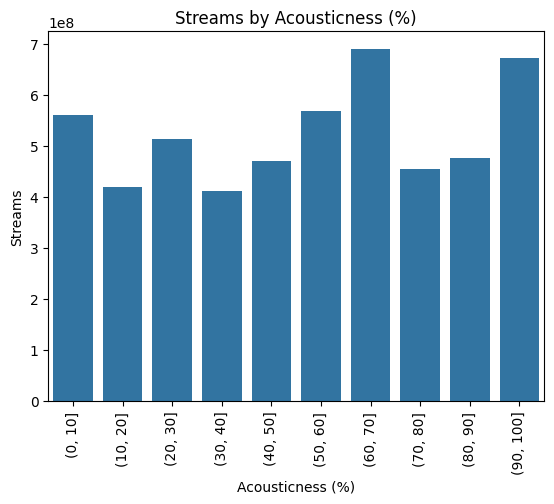

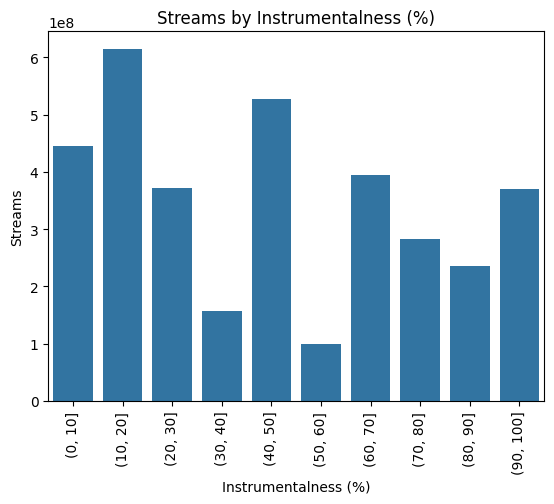

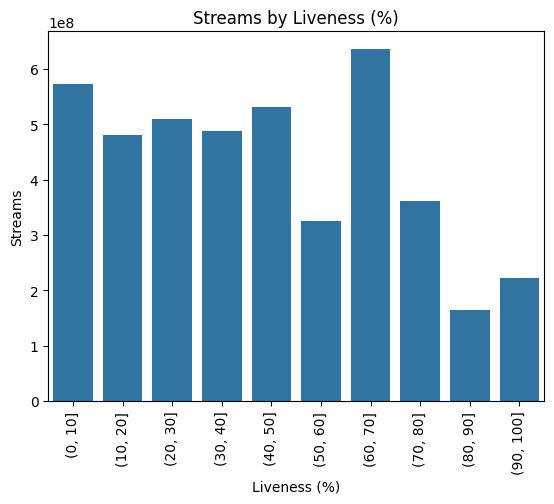

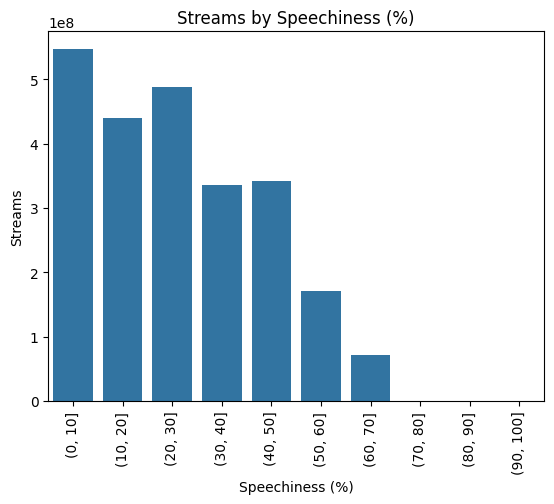

In [ ]:
df_grouped = df.groupby(pd.cut(df['bpm'], np.arange(0, 310, 10)))['streams'].mean().reset_index()
sns.barplot(x='bpm', y='streams', data=df_grouped)
plt.title('Streams by BPM')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.xticks(rotation=90)
plt.show()


df_grouped = df.groupby(pd.cut(df['danceability_%'], np.arange(0, 110, 10)))['streams'].mean().reset_index()
sns.barplot(x='danceability_%', y='streams', data=df_grouped)
plt.title('Streams by Danceability (%)')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')
plt.xticks(rotation=90)
plt.show()

df_grouped = df.groupby(pd.cut(df['valence_%'], np.arange(0, 110, 10)))['streams'].mean().reset_index()
sns.barplot(x='valence_%', y='streams', data=df_grouped)
plt.title('Streams by Valence (%)')
plt.xlabel('Valence (%)')
plt.ylabel('Streams')
plt.xticks(rotation=90)
plt.show()

df_grouped = df.groupby(pd.cut(df['energy_%'], np.arange(0, 110, 10)))['streams'].mean().reset_index()
sns.barplot(x='energy_%', y='streams', data=df_grouped)
plt.title('Streams by Energy (%)')
plt.xlabel('Energy (%)')
plt.ylabel('Streams')
plt.xticks(rotation=90)
plt.show()

df_grouped = df.groupby(pd.cut(df['acousticness_%'], np.arange(0, 110, 10)))['streams'].mean().reset_index()
sns.barplot(x='acousticness_%', y='streams', data=df_grouped)
plt.title('Streams by Acousticness (%)')
plt.xlabel('Acousticness (%)')
plt.ylabel('Streams')
plt.xticks(rotation=90)
plt.show()

df_grouped = df.groupby(pd.cut(df['instrumentalness_%'], np.arange(0, 110, 10)))['streams'].mean().reset_index()
sns.barplot(x='instrumentalness_%', y='streams', data=df_grouped)
plt.title('Streams by Instrumentalness (%)')
plt.xlabel('Instrumentalness (%)')
plt.ylabel('Streams')
plt.xticks(rotation=90)
plt.show()

df_grouped = df.groupby(pd.cut(df['liveness_%'], np.arange(0, 110, 10)))['streams'].mean().reset_index()
sns.barplot(x='liveness_%', y='streams', data=df_grouped)
plt.title('Streams by Liveness (%)')
plt.xlabel('Liveness (%)')
plt.ylabel('Streams')
plt.xticks(rotation=90)
plt.show()

df_grouped = df.groupby(pd.cut(df['speechiness_%'], np.arange(0, 110, 10)))['streams'].mean().reset_index()
sns.barplot(x='speechiness_%', y='streams', data=df_grouped)
plt.title('Streams by Speechiness (%)')
plt.xlabel('Speechiness (%)')
plt.ylabel('Streams')
plt.xticks(rotation=90)
plt.show()


We can infer from this graph that 1 or 2 artist count is generally better for stream performance. Anything higher is generally bad for the song.


We can infer that the best date to release is on the 1st of the month and the best month to release is in January.

# **Linear Regression Model**

In [ ]:
#Do Linear Regression Model here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('spotify-2023.csv')
df = pd.get_dummies(df, columns=['mode'])
df = pd.get_dummies(df, columns=['key'])


X = df[['artist_count', 'released_year', 'released_month', 'released_day', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
y = df['streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('R-squared: {}'.format(r2))
print('Mean squared error: {}'.format(mse))
print('Root mean squared error: {}'.format(rmse))

print('Intercept:', mlr.intercept_)
print('Coefficients:', mlr.coef_)


dummy_data = {

    'danceability_%': [80],
    'valence_%': [0],
    'energy_%': [0],

}
dummydf = pd.DataFrame(dummy_data)

predicted_streams = mlr.predict(dummydf)

print("\nPredicted Streams")
print("{:.0f}".format(predicted_streams[0]))

R-squared: -0.003512417429586856
Mean squared error: 3.0308990741669274e+17
Root mean squared error: 550536018.2737299
Intercept: 756503906.0764313
Coefficients: [-3706482.34002719  1735225.59379515 -1141281.83445123]

Predicted Streams
459985319


'track_name': ['balls in yo jaws'],
    'artist_name': ['gao rui'],
    'artist_count': [1],
    'released_year': [2023],
    'released_month': [1],
    'released_day': [1],
    'in_spotify_playlists': [0],
    'in_spotify_charts': [0],
    'streams': [0], #predict this
    'in_apple_playlists': [0],
    'in_apple_charts': [0],
    'in_deezer_playlists': [0],
    'in_deezer_charts': [0],
    'in_shazam_charts': [10],
    'bpm': [0],
    'key': ['C'],
    'mode': ['major'],
    'acousticness_%': [0],
    'instrumentalness_%': [50],
    'liveness_%': [25],
    'speechness_%': [31]

In [ ]:
#To gaorui: this only tests for variables EXCLUDING KEY AND MODE(ONE-HOT ENCODING NEEDED)
df = pd.read_csv('spotify-2023.csv')
df = pd.get_dummies(df, columns=['mode'])
df = pd.get_dummies(df, columns=['key'])

X = df[['artist_count', 'released_year', 'released_month', 'released_day', 'bpm', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'danceability_%', 'valence_%', 'energy_%']]
y = df['streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('R-squared: {}'.format(r2))
print('Mean squared error: {:.8f}'.format(mse))
print('Root mean squared error: {:.8f}'.format(rmse))

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


dummy_data = {
    'artist_count': [1],
    'released_year': [2023],
    'released_month': [1],
    'released_day': [1],
    'bpm': [0],
    'acousticness_%': [0],
    'instrumentalness_%': [50],
    'liveness_%': [25],
    'speechiness_%': [31],
    'danceability_%': [80],
    'valence_%': [0],
    'energy_%': [0],

}
dummydf = pd.DataFrame(dummy_data)

predicted_streams = model.predict(dummydf)

print("\nPredicted Streams")
print("{:.0f}".format(predicted_streams[0]))




R-squared: 0.011317291927571471
Mean squared error: 298610904309197120.00000000
Root mean squared error: 546453021.13648999
Intercept: 27654261071.916824
Coefficients: [-48904866.15421841 -13285847.83501604  -5542484.25254351
   5102421.89785031   -931797.08865353   -734434.51981322
  -2652754.72475684  -3119576.96672941  -4543651.6664784
  -1205643.16683975    551461.89247839    240933.94233563]

Predicted Streams
279714158


In [ ]:
df1 = pd.read_csv('spotify-2023 unmodified.csv')

X = df1[['artist_count', 'released_year', 'released_month', 'released_day', 'bpm', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'danceability_%', 'valence_%', 'energy_%']]
y = df1['in_spotify_charts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('R-squared: {}'.format(r2))
print('Mean squared error: {:.8f}'.format(mse))
print('Root mean squared error: {:.8f}'.format(rmse))

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


dummy_data = {
    'artist_count': [1],
    'released_year': [2023],
    'released_month': [1],
    'released_day': [1],
    'bpm': [0],
    'acousticness_%': [0],
    'instrumentalness_%': [50],
    'liveness_%': [25],
    'speechiness_%': [31],
    'danceability_%': [80],
    'valence_%': [0],
    'energy_%': [0],
}
dummydf = pd.DataFrame(dummy_data)


predicted_chart = model.predict(dummydf)
print("\nChart Rank")
print("{:.0f}".format(predicted_chart[0]))

R-squared: -0.018287426479190794
Mean squared error: 336.04062713
Root mean squared error: 18.33141094
Intercept: -219.73044654680655
Coefficients: [-0.29295538  0.11268116 -0.38435872 -0.0110168   0.01395425  0.01361103
 -0.00366309 -0.1046894  -0.22639984  0.01149887  0.02640341  0.11651001]

Chart Rank
-1


In [ ]:
#POLYNOMIAL
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df1 = pd.read_csv('spotify-2023 unmodified.csv')

X = df1[['artist_count', 'released_year', 'released_month', 'released_day', 'bpm', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'danceability_%', 'valence_%', 'energy_%']]
y = df1['in_spotify_charts']

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print('R-squared: {}'.format(r2))
print('Mean squared error: {:.8f}'.format(mse))
print('Root mean squared error: {:.8f}'.format(rmse))

new_data = {
    'artist_count': [1],
    'released_year': [2023],
    'released_month': [1],
    'released_day': [1],
    'bpm': [0],
    'acousticness_%': [0],
    'instrumentalness_%': [50],
    'liveness_%': [25],
    'speechiness_%': [31],
    'danceability_%': [80],
    'valence_%': [0],
    'energy_%': [0],
}

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

new_data_poly = poly_features.transform(pd.DataFrame(new_data))
predicted_chart = model.predict(new_data_poly)

print("\nChart Rank")
print("{:.0f}".format(predicted_chart[0]))

R-squared: 0.09797893962858462
Mean squared error: 345.53521478
Root mean squared error: 18.58857754
Intercept: -18159.883010747006
Coefficients: [ 3.16247463e-09 -1.06728363e+02  1.94731119e+01 -1.00184676e+01
 -4.04925565e+01 -3.61309297e+00 -6.64779985e+00 -2.31387145e+01
 -4.85496791e+00  3.69138631e+01 -1.99912877e+01  3.01327431e+00
 -6.68472245e+00 -6.22736868e-01  5.31606155e-02  4.35011319e-01
 -2.37340937e-01 -1.39288213e-02  5.40832676e-02 -2.11553707e-01
 -3.78847479e-02  2.08357484e-02 -2.06969962e-02  3.80611347e-02
  4.59075829e-02 -5.18327869e-03  5.09781217e-03  1.96202838e-02
  1.65366817e-03  3.14080102e-03  1.13269630e-02  2.50191892e-03
 -1.84353388e-02  1.03403128e-02 -1.54167886e-03  3.08053959e-03
 -1.27649167e-01 -1.06948271e-03  2.10768580e-03  6.70409786e-03
  1.62252366e-03 -1.84862815e-04  8.15215379e-03  4.38087939e-03
 -4.46638879e-03  7.33165053e-04  2.21670099e-03  2.88932965e-03
  8.14639810e-03  6.34003657e-03  1.05617229e-02  5.00732076e-03
 -2.22684

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

df1 = pd.read_csv('spotify-2023 unmodified.csv')

X = df1[['artist_count', 'released_month', 'released_day', 'bpm', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'danceability_%', 'valence_%', 'energy_%']]
y = df1['in_spotify_charts']

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print('R-squared: {}'.format(r2))
print('Mean squared error: {:.8f}'.format(mse))
print('Root mean squared error: {:.8f}'.format(rmse))

new_data = {
    'artist_count': [1],
    'released_month': [1],
    'released_day': [1],
    'bpm': [175],
    'acousticness_%': [0],
    'instrumentalness_%': [15],
    'liveness_%': [65],
    'speechiness_%': [5],
    'danceability_%': [80],
    'valence_%': [45],
    'energy_%': [25],
}

new_data_poly = poly_features.transform(pd.DataFrame(new_data))
predicted_streams = model.predict(new_data_poly)

print("\nPredicted Streams")
print("{:.0f}".format(predicted_streams[0]))


R-squared: 0.08662345319574505
Mean squared error: 349.88513588
Root mean squared error: 18.70521681

Predicted Streams
33
